In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#!pip install cmake "gym[atari]" scipy

In [3]:
import gym
#Loading and rendering the gym environment
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
print('Number of states: {}'.format(env.observation_space.n))
print('Number of actions: {}'.format(env.action_space.n))

Number of states: 500
Number of actions: 6


In [5]:
#Setting the hyperparameters
decay = 0.001

#learning rate
alpha = 0.5              
max_alpha = 0.9
min_alpha = 0.05

#discount factor
gamma = 1
max_gamma = 1
min_gamma = 0.9

#exploring epsilon
epsilon = 1                  
max_epsilon = 1
min_epsilon = 0.01
         
#Creating lists to keep track of reward and parameter values
training_rewards = []  
epsilons = []
alphas = []
gammas = []
max_steps = 100


In [6]:
#initialising qtable dictionary
# A nested dictionary that maps 
# state -> (action -> action-value). 
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0

In [7]:
def exploring_func(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)])

In [8]:
def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    
    qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
    q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])

In [9]:
def decay_alpha(alpha, max_alpha, min_alpha, decay, episode): 
        alpha = min_alpha + (max_alpha - min_alpha)*np.exp(-decay*episode)  
        return alpha

In [10]:
def decay_epsilon( epsilon, min_epsilon, max_epsilon, decay ,episode):
    #Cutting down on exploration by reducing the epsilon 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
        return epsilon

In [11]:
def decay_gamma(gamma, min_gamma, max_gamma, decay, episode): 
    gamma = min_gamma + (max_gamma - min_gamma)*np.exp(-decay*episode)
    return gamma

In [12]:
%%time
num_of_episodes = 100000
for episode in range(num_of_episodes):
    # Reset the enviroment
    state = env.reset()
    
    # Initialize variables
    reward = 0
    terminated = False

    #Starting the tracker for the rewards
    total_training_rewards = 0

    for step in range(100):
        # Take learned path or explore new actions based on the epsilon
        action = exploring_func(state, epsilon)

        # Take action    
        next_state, reward, terminated, info = env.step(action) 
        update_q_table(state, action, reward, next_state, alpha, gamma)
        #Increasing our total reward and updating the state
        total_training_rewards += reward
        state = next_state

        #Ending the episode
        if terminated == True:
            #print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
            
    alpha = decay_alpha(alpha, max_alpha, min_alpha, decay, episode)
    gamma = decay_gamma(gamma, min_gamma, max_gamma, decay, episode)
    epsilon = decay_epsilon( epsilon, min_epsilon, max_epsilon, decay ,episode)
        
    #Adding the total reward and reduced parameter values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)
    alphas.append(alpha)
    gammas.append(gamma)

    if (episode + 1) % 100 == 0:
        clear_output(wait=True)
        print("Episode: {}".format(episode + 1))
        env.render()

print("**********************************")
print("Training is done!\n")
print("**********************************")
print ("Training score over time: " + str(sum(training_rewards)/num_of_episodes))

Episode: 100000
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
**********************************
Training is done!

**********************************
Training score over time: 5.44639
Wall time: 54 s


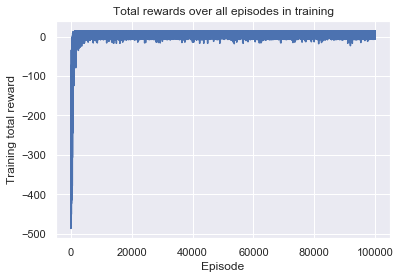

In [13]:
#Visualizing results and total reward over all episodes
num_of_episodes = 100000
x = range(num_of_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

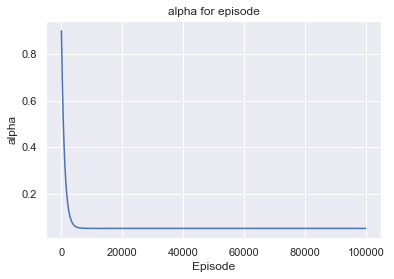

In [14]:
#Visualizing the alphas over all episodes
plt.plot(alphas)
plt.xlabel('Episode')
plt.ylabel('alpha')
plt.title("alpha for episode")
plt.show()

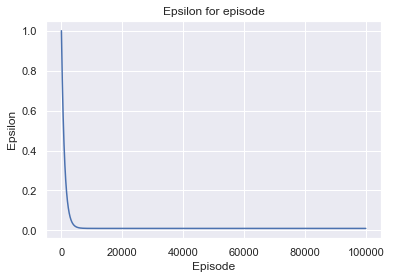

In [15]:
#Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()

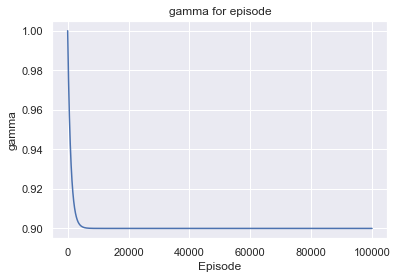

In [16]:
#Visualizing the gammas over all episodes
plt.plot(gammas)
plt.xlabel('Episode')
plt.ylabel('gamma')
plt.title("gamma for episode")
plt.show()

In [17]:
total_epochs, total_penalties = 0, 0
num_of_episodes = 100

for _ in range(num_of_episodes):
    state = env.reset()
    epochs = 0
    penalties = 0
    reward = 0
    
    terminated = False
    
    while not terminated:
        action = np.argmax([q[(state, a)] for a in range(env.action_space.n)])
        state, reward, terminated, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print("**********************************")
print("Results")
print("**********************************")
print("Epochs per episode: {}".format(total_epochs / num_of_episodes))
print("Penalties per episode: {}".format(total_penalties / num_of_episodes))

**********************************
Results
**********************************
Epochs per episode: 13.48
Penalties per episode: 0.0


In [18]:
total_penalties

0

In [19]:
epsilons

[1.0,
 0.9990104948350412,
 0.9980219786806598,
 0.9970344505483393,
 0.9960479094505515,
 0.9950623544007555,
 0.9940777844133959,
 0.9930941985039028,
 0.99211159568869,
 0.9911299749851548,
 0.9901493354116764,
 0.9891696759876151,
 0.9881909957333113,
 0.9872132936700847,
 0.9862365688202333,
 0.985260820207032,
 0.9842860468547323,
 0.9833122477885605,
 0.9823394220347178,
 0.9813675686203779,
 0.9803966865736877,
 0.979426774923765,
 0.978457832700698,
 0.9774898589355443,
 0.9765228526603302,
 0.9755568129080493,
 0.9745917387126619,
 0.9736276291090934,
 0.9726644831332344,
 0.9717022998219388,
 0.970741078213023,
 0.9697808173452657,
 0.9688215162584056,
 0.9678631739931417,
 0.9669057895911316,
 0.9659493620949908,
 0.9649938905482919,
 0.9640393739955629,
 0.9630858114822876,
 0.962133202054903,
 0.9611815447608,
 0.9602308386483209,
 0.9592810827667597,
 0.9583322761663603,
 0.9573844178983162,
 0.9564375070147689,
 0.9554915425688075,
 0.9545465236144673,
 0.95360244920672

In [20]:
gammas

[1.0,
 0.9999000499833375,
 0.9998001998667333,
 0.9997004495503373,
 0.9996007989343991,
 0.9995012479192682,
 0.9994017964053935,
 0.9993024442933235,
 0.9992031914837061,
 0.9991040378772884,
 0.9990049833749168,
 0.9989060278775369,
 0.998807171286193,
 0.9987084135020288,
 0.9986097544262862,
 0.9985111939603063,
 0.9984127320055285,
 0.998314368463491,
 0.9982161032358301,
 0.9981179362242806,
 0.9980198673306755,
 0.997921896456946,
 0.997824023505121,
 0.9977262483773277,
 0.9976285709757909,
 0.9975309912028333,
 0.9974335089608749,
 0.9973361241524337,
 0.9972388366801247,
 0.9971416464466605,
 0.9970445533548509,
 0.9969475573076025,
 0.9968506582079197,
 0.9967538559589032,
 0.9966571504637507,
 0.9965605416257567,
 0.9964640293483124,
 0.9963676135349053,
 0.99627129408912,
 0.9961750709146366,
 0.9960789439152323,
 0.9959829129947799,
 0.9958869780572485,
 0.995791139006703,
 0.9956953957473047,
 0.99559974818331,
 0.9955041962190715,
 0.9954087397590371,
 0.9953133787077

In [21]:
alphas

[0.9,
 0.8991504248583688,
 0.8983016988672331,
 0.8974538211778671,
 0.8966067909423928,
 0.89576060731378,
 0.894915269445845,
 0.8940707764932498,
 0.8932271276115016,
 0.8923843219569512,
 0.8915423586867929,
 0.8907012369590634,
 0.8898609559326409,
 0.8890215147672444,
 0.8881829126234326,
 0.8873451486626033,
 0.8865082220469924,
 0.8856721319396732,
 0.8848368775045556,
 0.8840024579063851,
 0.883168872310742,
 0.8823361198840407,
 0.8815041997935286,
 0.8806731112072855,
 0.879842853294223,
 0.8790134252240828,
 0.878184826167437,
 0.8773570552956863,
 0.8765301117810599,
 0.8757039947966141,
 0.874878703516232,
 0.874054237114622,
 0.873230594767318,
 0.8724077756506773,
 0.8715857789418806,
 0.8707646038189315,
 0.8699442494606546,
 0.8691247150466955,
 0.8683059997575197,
 0.8674881027744118,
 0.8666710232794748,
 0.865854760455629,
 0.8650393134866119,
 0.8642246815569761,
 0.8634108638520896,
 0.862597859558135,
 0.8617856678621075,
 0.8609742879518154,
 0.860163719015879